In [4]:
from utils.io import load_yaml

import os
import pandas as pd

# Load F-MAP Log

In [36]:
def load_cevncf_fmap_log(folder_path):
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                 if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.csv')]
    aggregate_result = pd.DataFrame()
    for record in csv_files:
        df = pd.read_csv(record)
        aggregate_result = aggregate_result.append(df.groupby(['model'], as_index=False)
 .agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'}))
    return aggregate_result

In [37]:
def load_fmap_log(folder_path):
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                 if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.csv')]
    aggregate_result = pd.DataFrame()
    for record in csv_files:
        df = pd.read_csv(record)
        aggregate_result = aggregate_result.append(df.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch_rating','epoch_explanation', 'corruption', 'optimizer'], as_index=False)
 .agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])
    return aggregate_result

In [44]:
df_cdsvinyl_ub = load_fmap_log(folder_path='tables/CDsVinyl_fmap_ub/S_E_CDE_VAE_OLD/')
df_cdsvinyl_zeroout = load_fmap_log(folder_path='tables/CDsVinyl_fmap_zeroout/S_E_CDE_VAE_OLD/')
df_cdsvinyl_re = load_fmap_log(folder_path='tables/CDsVinyl_fmap/S_E_CDE_VAE_OLD/')
df_cdsvinyl_lb = load_fmap_log(folder_path='tables/CDsVinyl_fmap_ub/S_E_CDE_VAE_OLD/LB')

In [46]:
df_cdsvinyl_re

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch_rating,epoch_explanation,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,S-E-CDE-VAE,200,0.0001,0.0001,1,0.1,1,0.0001,400,300,0.4,Adam,0.062824,0.076760,0.084882
0,S-E-CDE-VAE,200,0.0001,0.0001,1,0.1,1,0.0001,400,300,0.4,Adam,0.065615,0.072156,0.078971


In [47]:
#filtered_df_cdsvinyl_zeroout = df_cdsvinyl_zeroout.loc[(df_cdsvinyl_zeroout['F-MAP@5'] != 0) & (df_cdsvinyl_zeroout['F-MAP@10'] != 0) & (df_cdsvinyl_zeroout['F-MAP@20'] != 0)]
#filtered_df_cdsvinyl_re = df_cdsvinyl_re.loc[(df_cdsvinyl_re['F-MAP@5'] != 0) & (df_cdsvinyl_re['F-MAP@10'] != 0) & (df_cdsvinyl_re['F-MAP@20'] != 0)]

In [48]:
#filtered_df_cdsvinyl_zeroout.loc[filtered_df_cdsvinyl_zeroout['beta']==0.001].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})
filtered_zeroout = df_cdsvinyl_zeroout.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})
filtered_zeroout

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,S-E-CDE-VAE,200,0.0001,0.0001,1,0.1,1,0.0001,0.4,Adam,0.095709,0.097314,0.097474


In [49]:
#filtered_df_cdsvinyl_re.loc[filtered_df_cdsvinyl_re['beta']==0.01].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})
filtered_re = df_cdsvinyl_re.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})
filtered_re

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,S-E-CDE-VAE,200,0.0001,0.0001,1,0.1,1,0.0001,0.4,Adam,0.06422,0.074458,0.081927


In [50]:
filtered_ub = df_cdsvinyl_ub.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})
filtered_ub

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,S-E-CDE-VAE,200,0.0001,0.0001,1,0.1,1,0.0001,0.4,Adam,0.651459,0.647747,0.64249


In [51]:
filtered_lb = df_cdsvinyl_lb.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})
filtered_lb

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,S-E-CDE-VAE,200,0.0001,0.0001,1,0,1,0.0001,0.4,Adam,0.027355,0.031583,0.038223


In [52]:
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def pandas_bar_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.barplot(ax=ax, x=x, y=y, hue=hue, data=df, errwidth=1, edgecolor='black', facecolor=(1, 1, 1, 0)) #, errwidth=0.5

    num_category = len(df[x].unique())
    hatch = None
    hatches = itertools.cycle(['//', '\\\\\\\\', ' ', '**', '////', '----', 'xxxx', '\\', '...', 'OOO', "++++++++"])
    for i, bar in enumerate(ax.patches):
        if i % num_category == 0:
            hatch = next(hatches)
        bar.set_hatch(hatch)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper left', ncol=5)
    # if 'Precision' not in y:
    ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_bar.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_bar.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(5, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=2)
        ax_leg.axis('off')
        fig_leg.savefig('figs/bar_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

In [53]:
def return_barplot_df(df):
    df_fmap5 = df[['model', 'F-MAP@5']]
    df_fmap5.loc[:, 'Metric'] = ['F-MAP@5']*len(df_fmap5)
    df_fmap5.rename(columns={'F-MAP@5':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap10 = df[['model', 'F-MAP@10']]
    df_fmap10.loc[:, 'Metric'] = ['F-MAP@10']*len(df_fmap10)
    df_fmap10.rename(columns={'F-MAP@10':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap20 = df[['model', 'F-MAP@20']]
    df_fmap20.loc[:, 'Metric'] = ['F-MAP@20']*len(df_fmap20)
    df_fmap20.rename(columns={'F-MAP@20':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap5 = df_fmap5.sort_values('Model', ascending=False)
    df_fmap10 = df_fmap10.sort_values('Model', ascending=False)
    df_fmap20 = df_fmap20.sort_values('Model', ascending=False)

    makeup_df = df_fmap5.append(df_fmap10).append(df_fmap20)

    makeup_df['Metric'] = makeup_df['Metric'].apply(lambda m: m.replace('F-MAP@', 'N='))
    
    return makeup_df

In [54]:
bar_zeroout = return_barplot_df(filtered_zeroout)
bar_zeroout['Model'] = 'Zero Out'
bar_re = return_barplot_df(filtered_re)
bar_re['Model'] = 'Energy Redistribution'
bar_ub = return_barplot_df(filtered_ub)
bar_ub['Model'] = 'Upper Bound'
bar_lb = return_barplot_df(filtered_lb)
bar_lb['Model'] = 'Random Noise'


/home/hojin/anaconda3/envs/de/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/hojin/anaconda3/envs/de/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/hojin/anaconda3/envs/de/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [55]:
#filtered_df_cdsvinyl_cevncf = load_cevncf_fmap_log("tables/CDsVinyl_fmap/CE_VNCF/")

In [56]:
#bar_df_cdsvinyl_cevncf = return_barplot_df(filtered_df_cdsvinyl_cevncf)
#bar_df_cdsvinyl_cevncf['Model'] = 'CE-VNCF-ZO'

/home/hojin/code/Dual-Encoder/utils/io.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)[key]


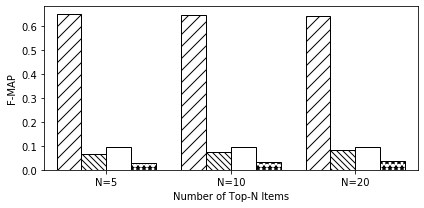

In [59]:
pandas_bar_plot(df=bar_ub.append(bar_re).append(bar_zeroout).append(bar_lb), x='Metric', y='F-MAP', hue='Model', x_name='Number of Top-N Items', y_name='F-MAP', folder="CDsVinyl", name='F-MAP-original-with-UB', save=True)
#pandas_bar_plot(df=bar_re.append(bar_zeroout).append(bar_lb), x='Metric', y='F-MAP', hue='Model', x_name='Number of Top-N Items', y_name='F-MAP', folder="CDsVinyl", name='F-MAP-original', save=True)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=4,
#       ncol=4, mode="expand", borderaxespad=0.)

No handles with labels found to put in legend.


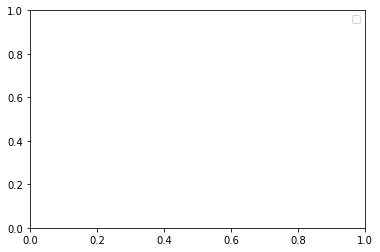

In [70]:
plt.legend()

In [27]:
df = pd.read_csv("tables/beer_fmap/CE_VNCF/beer_Critiquing_FMAP.csv")

In [28]:
df_CEVNCF = df

In [26]:
#df_CEVNCF = df.loc[df['model'] == 'CE-VNCF'].reset_index(drop=True)

In [31]:
for i in range(95):
    filename = 'tables/beer_fmap/CE_VNCF/beer_CEVNCF_Critiquing' + str(i+1) + '_FMAP.csv'
    df.iloc[500*i:500*(i+1)].reset_index(drop=True).to_csv(filename,index=False)

In [26]:
df_CEVNCF.iloc[:500,:].to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing6_FMAP.csv',index=False)

In [27]:
df_CEVNCF.iloc[500:1000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing7_FMAP.csv',index=False)

In [28]:
df_CEVNCF.iloc[1000:1500,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing8_FMAP.csv',index=False)

In [29]:
df_CEVNCF.iloc[1500:2000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing9_FMAP.csv',index=False)

In [30]:
df_CEVNCF.iloc[2000:2500,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing10_FMAP.csv',index=False)

In [31]:
df_CEVNCF.iloc[2500:3000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing11_FMAP.csv',index=False)

In [32]:
df_CEVNCF.iloc[3000:3500,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing12_FMAP.csv',index=False)

In [33]:
df_CEVNCF.iloc[3500:4000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing13_FMAP.csv',index=False)

In [34]:
df_CEVNCF.iloc[4000:4500,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing14_FMAP.csv',index=False)

In [35]:
df_CEVNCF.iloc[4500:5000,:].reset_index(drop=True).to_csv('tables/CDsVinyl_fmap/CE_VNCF/CDsVinyl_CEVNCF_Critiquing15_FMAP.csv',index=False)

In [27]:
df_cdsvinyl_ub = load_fmap_log(folder_path='tables/CDsVinyl_fmap_ub/')

In [28]:
df_cdsvinyl_ub

""


# Beer

In [14]:
df_beer_zeroout = load_fmap_log(folder_path='tables/beer_fmap_zeroout/')
df_beer_re = load_fmap_log(folder_path='tables/beer_fmap/')

In [15]:
filtered_df_beer_zeroout = df_beer_zeroout.loc[(df_beer_zeroout['F-MAP@5'] != 0) & (df_beer_zeroout['F-MAP@10'] != 0) & (df_beer_zeroout['F-MAP@20'] != 0)]
filtered_df_beer_re = df_beer_re.loc[(df_beer_re['F-MAP@5'] != 0) & (df_beer_re['F-MAP@10'] != 0) & (df_beer_re['F-MAP@20'] != 0)]

In [16]:
filtered_df_beer_zeroout.loc[filtered_df_beer_zeroout['beta']==0.0001].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,0.0001,0.001,1,1,1,0.0005,600,0.4,Adam,0.03059,0.029189,0.027128


In [17]:
filtered_df_beer_re.loc[filtered_df_beer_re['beta']==1e-7].groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False).agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,1.000000e-07,0.001,1,1,1,0.0005,600,0.4,Adam,0.032347,0.030943,0.02869


In [22]:
bar_df_beer_zeroout = return_barplot_df(filtered_df_beer_zeroout.loc[filtered_df_beer_zeroout['beta'] == 0.0001])
bar_df_beer_zeroout['Model'] = 'CE-VAE-ZO'
bar_df_beer_re = return_barplot_df(filtered_df_beer_re.loc[filtered_df_beer_re['beta'] == 1e-7])
bar_df_beer_re['Model'] = 'CE-VAE-ER'

In [23]:
filtered_df_beer_cevncf = load_cevncf_fmap_log("tables/beer_fmap/CE_VNCF/")

In [24]:
bar_df_beer_cevncf = return_barplot_df(filtered_df_beer_cevncf)
bar_df_beer_cevncf['Model'] = 'CE-VNCF-ZO'

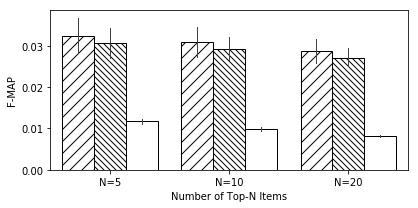

In [26]:
pandas_bar_plot(df=bar_df_beer_re.append(bar_df_beer_zeroout).append(bar_df_beer_cevncf), x='Metric', y='F-MAP', hue='Model', x_name='Number of Top-N Items', y_name='F-MAP', folder="beer", name='beer_FMAP_Redistribution_Zero_Out', save=True)

In [5]:
sns.palplot(sns.color_palette("colorblind"))

NameError: name 'sns' is not defined

In [6]:
pal = sns.color_palette("colorblind")
pal.as_hex()

NameError: name 'sns' is not defined

In [7]:
def fmap_metrics_plot(df_fmap, df_metrics, x_fmap, y_fmap, x_metrics, y_metrics, x_fmap_name, y_fmap_name, x_metrics_name, y_metrics_name,folder='figs', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.pointplot(ax=ax, x="beta", y="F-MAP@20", data=beta_fmap, linestyles=["--"], color='#0173b2')
    ax.set_xlabel('Beta')
    ax.set_ylabel('F-MAP@20', color='#0173b2')
    ax2 = ax.twinx()
    sns.pointplot(ax=ax2, x="Beta", y="NDCG", data=beta_metrics_df, linestyles=["--"], markers="x", color='#de8f05')
    ax2.set_ylabel('NDCG', color="#de8f05")
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_line.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_line.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(12, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=10)
        ax_leg.axis('off')
        fig_leg.savefig('figs/line_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

# Bar Plot for best beta

In [8]:
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def pandas_bar_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.barplot(ax=ax, x=x, y=y, hue=hue, data=df, errwidth=1, edgecolor='black', facecolor=(1, 1, 1, 0)) #, errwidth=0.5

    num_category = len(df[x].unique())
    hatch = None
    hatches = itertools.cycle(['//', '**', '////', '----', 'xxxx', '\\\\\\\\', ' ', '\\', '...', 'OOO', "++++++++"])
    for i, bar in enumerate(ax.patches):
        if i % num_category == 0:
            hatch = next(hatches)
        bar.set_hatch(hatch)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper left', ncol=5)
    # if 'Precision' not in y:
    ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_bar.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_bar.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(12, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=10)
        ax_leg.axis('off')
        fig_leg.savefig('figs/bar_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

In [9]:
def return_barplot_df(df):
    df_fmap5 = df[['model', 'F-MAP@5']]
    df_fmap5.loc[:, 'Metric'] = ['F-MAP@5']*len(df_fmap5)
    df_fmap5.rename(columns={'F-MAP@5':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap10 = df[['model', 'F-MAP@10']]
    df_fmap10.loc[:, 'Metric'] = ['F-MAP@10']*len(df_fmap10)
    df_fmap10.rename(columns={'F-MAP@10':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap20 = df[['model', 'F-MAP@20']]
    df_fmap20.loc[:, 'Metric'] = ['F-MAP@20']*len(df_fmap20)
    df_fmap20.rename(columns={'F-MAP@20':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap5 = df_fmap5.sort_values('Model', ascending=False)
    df_fmap10 = df_fmap10.sort_values('Model', ascending=False)
    df_fmap20 = df_fmap20.sort_values('Model', ascending=False)

    makeup_df = df_fmap5.append(df_fmap10).append(df_fmap20)

    makeup_df['Metric'] = makeup_df['Metric'].apply(lambda m: m.replace('F-MAP@', 'N='))
    
    return makeup_df

In [10]:
bar_df = return_barplot_df(filtered_df.loc[filtered_df['beta'] == 0.1])
bar_df

/home/kai/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/kai/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/kai/.local/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,Model,F-MAP,Metric
4,E-CDE-VAE,0.020987,N=5
4,E-CDE-VAE,0.024773,N=5
4,E-CDE-VAE,0.023513,N=5
4,E-CDE-VAE,0.023867,N=5
4,E-CDE-VAE,0.024313,N=5
4,E-CDE-VAE,0.026713,N=5
4,E-CDE-VAE,0.022360,N=5
4,E-CDE-VAE,0.021373,N=5
4,E-CDE-VAE,0.027287,N=5
4,E-CDE-VAE,0.022900,N=5


No handles with labels found to put in legend.


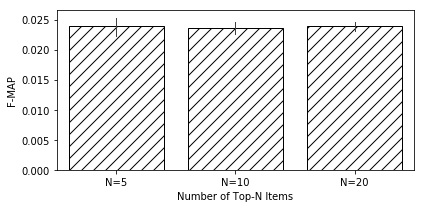

In [11]:
pandas_bar_plot(df=bar_df, x='Metric', y='F-MAP', hue=None, x_name='Number of Top-N Items', y_name='F-MAP', folder="CDsVinyl", name='CDsVinyl_FMAP', save=False)

# Point Plot for different beta

In [12]:
def return_pointplot_df(df):
    df_fmap5 = df[['beta', 'F-MAP@5']]
    df_fmap5.loc[:, 'Metric'] = ['F-MAP@5']*len(df_fmap5)
    df_fmap5.rename(columns={'F-MAP@5':'F-MAP', 'beta':'Beta'}, inplace=True)
    
    df_fmap10 = df[['beta', 'F-MAP@10']]
    df_fmap10.loc[:, 'Metric'] = ['F-MAP@10']*len(df_fmap10)
    df_fmap10.rename(columns={'F-MAP@10':'F-MAP', 'beta':'Beta'}, inplace=True)

    df_fmap20 = df[['beta', 'F-MAP@20']]
    df_fmap20.loc[:, 'Metric'] = ['F-MAP@20']*len(df_fmap20)
    df_fmap20.rename(columns={'F-MAP@20':'F-MAP', 'beta':'Beta'}, inplace=True)
    
    return df_fmap5, df_fmap10, df_fmap20

In [13]:
df_fmap5, df_fmap10, df_fmap20 = return_pointplot_df(filtered_df)

In [14]:
def pandas_point_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.pointplot(ax=ax, x=x, y=y, hue=hue, data=df, linestyles=["--"])

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper right', ncol=5)

#     ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_line.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_line.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(12, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=10)
        ax_leg.axis('off')
        fig_leg.savefig('figs/line_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

No handles with labels found to put in legend.


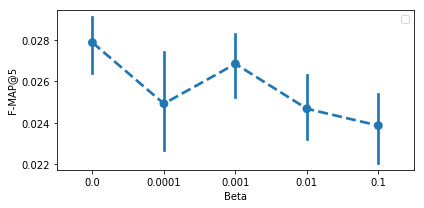

In [15]:
pandas_point_plot(df=df_fmap5.loc[df_fmap5['Beta'] != 1.0], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@5", folder='CDsVinyl', name='CDsVinyl_FMAP5_beta', save=False)

No handles with labels found to put in legend.


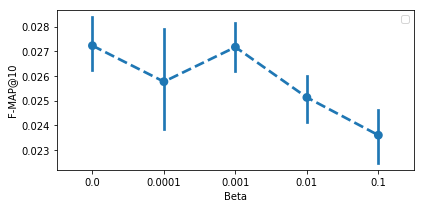

In [16]:
pandas_point_plot(df=df_fmap10.loc[df_fmap10['Beta'] != 1.0], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@10", folder='CDsVinyl', name='CDsVinyl_FMAP10_beta', save=False)

No handles with labels found to put in legend.


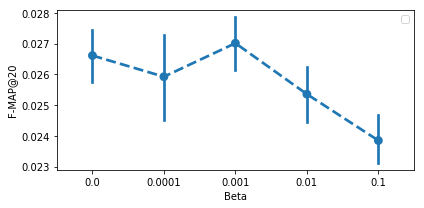

In [17]:
pandas_point_plot(df=df_fmap20.loc[df_fmap20['Beta'] != 1.0], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@20", folder='CDsVinyl', name='CDsVinyl_FMAP20_beta', save=False)

In [18]:
beta_fmap = (filtered_df.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
.agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])
beta_fmap

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.027864,0.027228,0.026612
1,E-CDE-VAE,200,0.0001,0.01,1,1,1,0.0001,600,0.4,Adam,0.024919,0.025770,0.025923
2,E-CDE-VAE,200,0.0010,0.01,1,1,1,0.0001,600,0.4,Adam,0.026839,0.027170,0.027013
3,E-CDE-VAE,200,0.0100,0.01,1,1,1,0.0001,600,0.4,Adam,0.024675,0.025132,0.025357
4,E-CDE-VAE,200,0.1000,0.01,1,1,1,0.0001,600,0.4,Adam,0.023861,0.023604,0.023848
5,E-CDE-VAE,200,1.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.000036,0.000577,0.001301


In [17]:
beta_metrics_df = pd.read_csv("tables/FMAP20_Recommendation_Metrics.csv").tail(6)
beta_metrics_df

,Dataset,Beta,NDCG,MAP@20,Precision@20,Recall@20,R-Precision
12,CdsVinyl,0.0000,0.7098,0.4111,0.2777,0.8567,0.4956
13,CdsVinyl,0.0001,0.7100,0.4105,0.2779,0.8572,0.4956
14,CdsVinyl,0.0010,0.7097,0.4105,0.2784,0.8583,0.4959
15,CdsVinyl,0.0100,0.7141,0.4125,0.2788,0.8601,0.4981
16,CdsVinyl,0.1000,0.7386,0.4298,0.2852,0.8813,0.5100
17,CdsVinyl,1.0000,0.6932,0.4056,0.2759,0.8546,0.4582


/home/kai/git/Dual-Encoder/utils/io.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)[key]


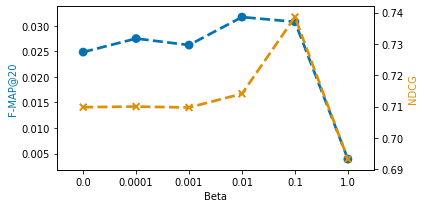

In [39]:
fmap_metrics_plot(df_fmap=beta_fmap, 
                  df_metrics=beta_metrics_df, 
                  x_fmap="beta", 
                  y_fmap="F-MAP@20", 
                  x_metrics="Beta", 
                  y_metrics="F-MAP@20", 
                  x_fmap_name="Beta", 
                  y_fmap_name="NDCG", 
                  x_metrics_name="Beta", 
                  y_metrics_name="NDCG",
                  folder='CDsVinyl', 
                  name='CDsVinyl_fmap20_NDCG', 
                  save=True)

# Beer

In [19]:
# df = load_fmap_log(folder_path='tables/beer_fmap/')
df = load_fmap_log(folder_path='tables/beer_fmap_zeroout/')
filtered_df = df.loc[(df['F-MAP@5'] != 0) & (df['F-MAP@10'] != 0) & (df['F-MAP@20'] != 0)]

In [20]:
bar_df = return_barplot_df(filtered_df.loc[filtered_df['beta'] == 1])

No handles with labels found to put in legend.


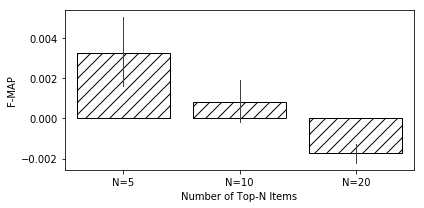

In [21]:
pandas_bar_plot(df=bar_df, x='Metric', y='F-MAP', hue=None, x_name='Number of Top-N Items', y_name='F-MAP', folder='beer', name='beer_FMAP', save=False)

No handles with labels found to put in legend.


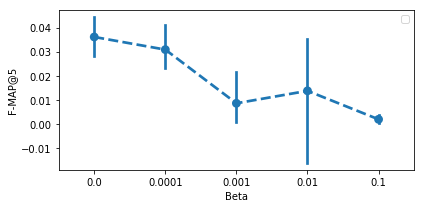

No handles with labels found to put in legend.


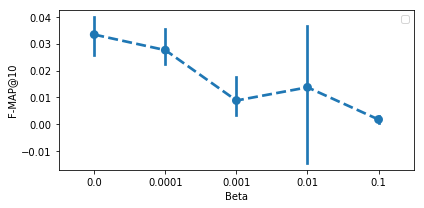

No handles with labels found to put in legend.


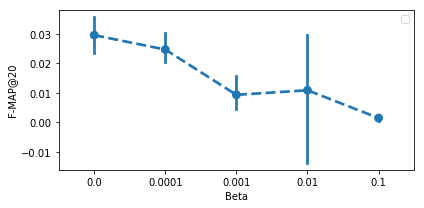

In [22]:
df_fmap5, df_fmap10, df_fmap20 = return_pointplot_df(filtered_df)
pandas_point_plot(df=df_fmap5.loc[~df_fmap5['Beta'].isin([1.0])], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@5", folder='beer', name='beer_FMAP5_beta', save=False)
pandas_point_plot(df=df_fmap10.loc[~df_fmap10['Beta'].isin([1.0])], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@10", folder='beer', name='beer_FMAP10_beta', save=False)
pandas_point_plot(df=df_fmap20.loc[~df_fmap20['Beta'].isin([1.0])], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@20", folder='beer', name='beer_FMAP20_beta', save=False)

In [23]:
beta_fmap = (filtered_df.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
.agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])
beta_fmap

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,0.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.036094,0.033398,0.029633
1,E-CDE-VAE,100,0.0001,0.001,1,1,1,0.0005,600,0.4,Adam,0.030855,0.027605,0.024730
2,E-CDE-VAE,100,0.0010,0.001,1,1,1,0.0005,600,0.4,Adam,0.008609,0.008839,0.009352
3,E-CDE-VAE,100,0.0100,0.001,1,1,1,0.0005,600,0.4,Adam,0.013770,0.013755,0.010901
4,E-CDE-VAE,100,0.1000,0.001,1,1,1,0.0005,600,0.4,Adam,0.001957,0.001757,0.001465
5,E-CDE-VAE,100,1.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.003269,0.000837,-0.001744


In [51]:
beta_fmap = (filtered_df.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
.agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])
beta_fmap

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,0.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.030666,0.029173,0.027408
1,E-CDE-VAE,100,0.0001,0.001,1,1,1,0.0005,600,0.4,Adam,0.029268,0.028542,0.028006
2,E-CDE-VAE,100,0.0010,0.001,1,1,1,0.0005,600,0.4,Adam,0.011167,0.012665,0.011731
3,E-CDE-VAE,100,0.0100,0.001,1,1,1,0.0005,600,0.4,Adam,0.016550,0.014210,0.014044
4,E-CDE-VAE,100,0.1000,0.001,1,1,1,0.0005,600,0.4,Adam,-0.000301,0.000839,0.001059
5,E-CDE-VAE,100,1.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.004712,0.001448,-0.002067


In [21]:
beta_metrics_df = pd.read_csv("tables/FMAP20_Recommendation_Metrics.csv").head(6)
beta_metrics_df

,Dataset,Beta,NDCG,MAP@20,Precision@20,Recall@20,R-Precision
0,Beer,0.0000,0.5609,0.8227,0.7783,0.4699,0.4471
1,Beer,0.0001,0.5612,0.8231,0.7792,0.4701,0.4478
2,Beer,0.0010,0.5606,0.8232,0.7794,0.4693,0.4466
3,Beer,0.0100,0.5618,0.8240,0.7809,0.4705,0.4488
4,Beer,0.1000,0.5843,0.8669,0.8058,0.4814,0.4591
5,Beer,1.0000,0.5854,0.8708,0.8071,0.4812,0.4595


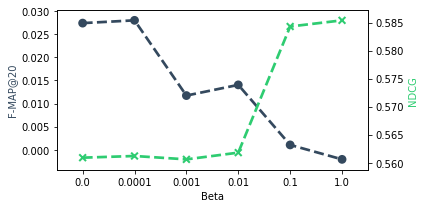

In [68]:
fmap_metrics_plot(df_fmap=beta_fmap, 
                  df_metrics=beta_metrics_df, 
                  x_fmap="beta", 
                  y_fmap="F-MAP@20", 
                  x_metrics="Beta", 
                  y_metrics="F-MAP@20", 
                  x_fmap_name="Beta", 
                  y_fmap_name="NDCG", 
                  x_metrics_name="Beta", 
                  y_metrics_name="NDCG",
                  folder='beer', 
                  name='beer_fmap20_NDCG', 
                  save=True)

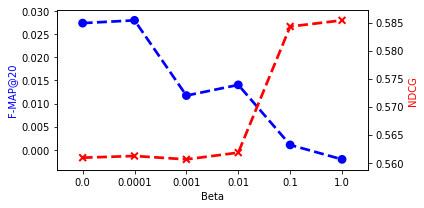

In [35]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.pointplot(ax=ax, x="beta", y="F-MAP@20", data=beta_fmap, linestyles=["--"], color='b')
ax.set_xlabel('Beta')
ax.set_ylabel('F-MAP@20', color='b')
ax2 = ax.twinx()
sns.pointplot(ax=ax2, x="Beta", y="NDCG", data=beta_metrics_df, linestyles=["--"], markers="x", color='r')
ax2.set_ylabel('NDCG', color='r')
plt.tight_layout()

In [ ]:
def pandas_point_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.pointplot(ax=ax, x=x, y=y, hue=hue, data=df, linestyles=["--"])

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper right', ncol=5)

#     ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_line.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_line.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(12, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=10)
        ax_leg.axis('off')
        fig_leg.savefig('figs/line_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()